In [1]:
using Pkg
Pkg.activate(".")

  Activating project at `~/PhD/CMBLensing_MicroCanonicalHMC.jl/examples`


In [2]:
using PythonPlot, CMBLensing, CMBLensingInferenceTestProblem

In [3]:
θpix  = 3        # pixel size in arcmin
Nside = 512      # number of pixels per side in the map
pol   = :P       # type of data to use (can be :T, :P, or :TP)
T     = Float32  # data type (Float32 is ~2 as fast as Float64);
field_deg = θpix*Nside/60

25.6

In [4]:
(;f, f̃, ϕ, ds) = load_sim(
    seed = 3,
    θpix = θpix,
    T = T,
    Nside = Nside,
    pol = pol,
    μKarcminT=2,
    beamFWHM=1,
    pixel_mask_kwargs = (edge_padding_deg=0.15*field_deg, apodization_deg=0, num_ptsrcs=0),
    bandpass_mask     = LowPass(5000)
)

(;Cf, Cϕ) = ds;
f̃ = LenseFlow(ϕ)*f;

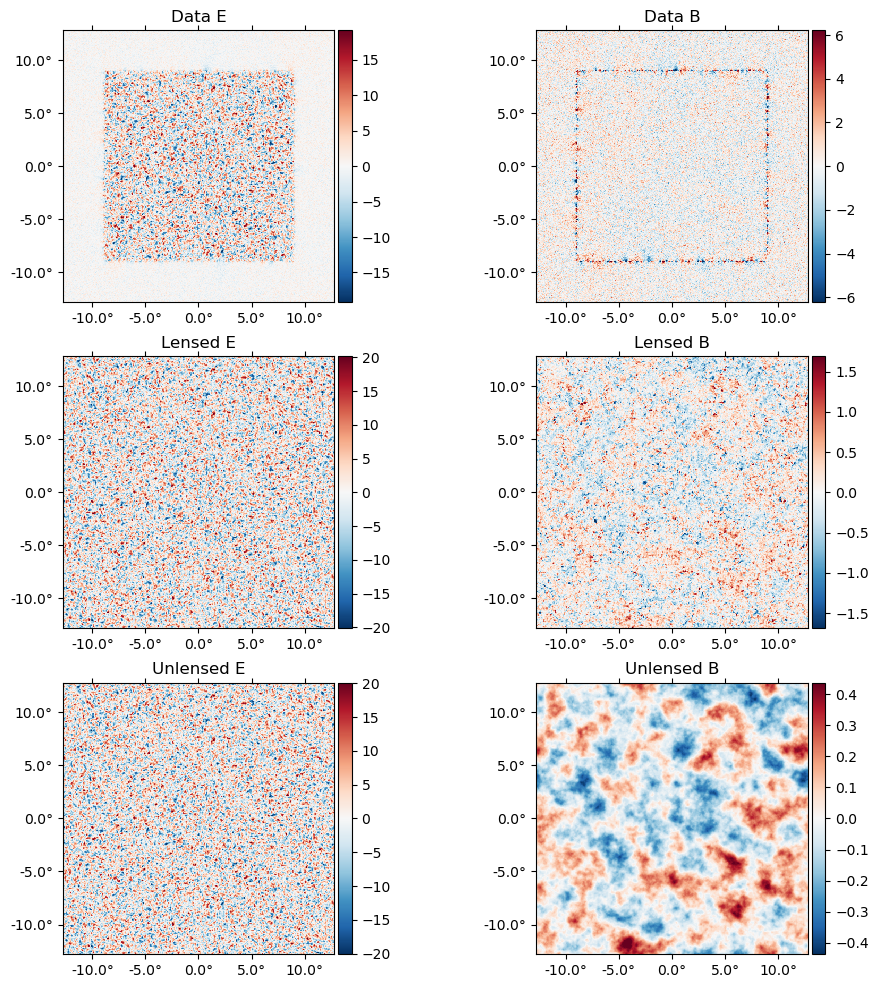

Python: None

In [7]:
plot([ds.d, f̃, f], title=["Data ", "Lensed ", "Unlensed "] .* ["E" "B"])
savefig("/mnt/c/Users/jaime/Desktop/mchmc_lensing/lensed_unlensed.pdf")